In [65]:
%pylab inline

import IPython
import sklearn as sk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print ('IPython version:', IPython.__version__)
print ('numpy version:', np.__version__)
print ('scikit-learn version:', sk.__version__)
print ('matplotlib version:', matplotlib.__version__)

Populating the interactive namespace from numpy and matplotlib
IPython version: 4.1.2
numpy version: 1.10.4
scikit-learn version: 0.17.1
matplotlib version: 1.5.1


`%matplotlib` prevents importing * from pylab and numpy


In [66]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target
print (X_iris.shape, y_iris.shape)
print (X_iris[0], y_iris[0])
print (y_iris)

(150, 4) (150,)
[ 5.1  3.5  1.4  0.2] 0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [67]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

# Get dataset with only the first two attributes
X, y = X_iris[:,:2], y_iris

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
# 전체 샘플에서 훈련 데이터와 테스트 데이터의 인덱스를 램덤하게 분류한다 / test_size 는 테스트 데이터의 비율을 입력함
print (X_train.shape, y_train.shape)

(112, 2) (112,)


In [69]:
scaler = StandardScaler().fit(X_train) # StandardScaler().fit 는 X_train의 값들을 표준화 시킬 수 있는 함수를 생성함

X_train = scaler.transform(X_train) # scalar에 X_train을 값을 넣어 모든 값을 표준화 시킴
X_test = scaler.transform(X_test) # scalar에 X_train을 값을 넣어 모든 값을 표준화 시킴

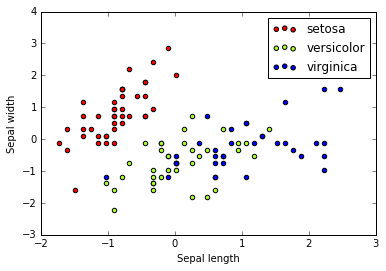

In [70]:
colors = ['red', 'greenyellow', 'blue']
for i in range(len(colors)):
    px = X_train[:, 0][y_train == i] 
    py = X_train[:, 1][y_train == i]
    # numpy의 indexing 기법중 하나로 X_train의 전체 값중 y_train의 index가 i와 같은 값들만 순차적으로 추출함

    plt.scatter(px, py, c=colors[i])

# 화면에 출력
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [86]:
# create the linear model classifier
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier() # stichastic Gradient Descent기울기 강하법 기반의 분류기 호출
# fit (train) the classifier
clf.fit(X_train, y_train) # 훈련 데이터와 훈련 라베을 받아 모델을 훈련 시킴
# print learned coeficients
print (clf.coef_)
print (clf.intercept_)

[[-28.56232699  12.3553701 ]
 [  7.33357044  -7.38899584]
 [ 20.12406263  -2.71333618]]
[-18.04452959  -8.83583574  -4.54920965]


#### 위의 값은 아래와 같이 선형 공식으로 변환이 가능함 

- Setosa: -17.74685846 + -25.58098438 * x +  12.3553701 * y
- Versicolor: -2.33476931  + 8.19869218 * x +   -8.14000854 * y
- Virginica: -10.29162885 + 27.45763308 * x +   -1.96232349* y

위 값에 각 샘플의 값을 대입했을 때, 0보다 크면 경계보다 위쪽(해당 꽃이 맞음), 그렇지 않을경우 아래쪽에 위치(해당 꽃이 아님)<br>
다행히 특별히 3개 유형의 이진 분류라고 설정을 하지 않아도 프로그램이 알아서 라벨 종류에 따른 이진 분류를 실시함


In [90]:
compute_x_setosa = X_test.dot(clf.coef_[0]) + clf.intercept_[0] 
# 위 수식에 Test 데이터를 대입함, 나온 값은 X_text array 크기가 나오며, 값 값이 0보다 크면 setosa 아닐 경우 다른 식물임

print(compute_x_setosa[y_test==0] > 0) 
# 위 결과 array 중에 test의 라벨 setosa인 경우에만 결과 값을 출력함, 모두 0을 넘으면 제대로 예측한 경우 
print(compute_x_setosa[y_test!=0] < 0)
# 위 결과 array 중에 test의 라벨 setosa가 아닌 경우에만 결과 값을 출력함, 모두 0보다 작으면 제대로 예측한 경우 

#zΩompute_x_setosa, y_train(1)

[ True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


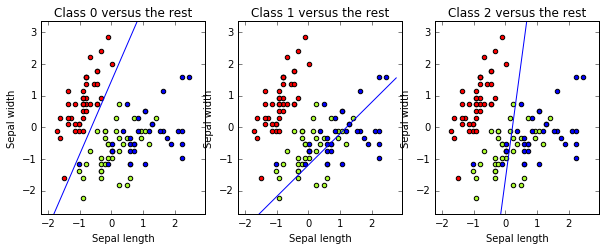

In [91]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min,x_max,0.5)

fig, axes = plt.subplots(1,3)
fig.set_size_inches(10,6)

for i in [0,1,2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class ' + str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    for j in range(len(colors)):
        px = X_train[:, 0][y_train == j]
        py = X_train[:, 1][y_train == j]
        plt.scatter(px, py, c=colors[j])
    ys = (-clf.intercept_[i]-xs*clf.coef_[i,0])/clf.coef_[i,1]
    plt.plot(xs,ys,hold=True)
    


In [93]:
print (clf.predict(scaler.transform([[4.7, 3.1]])))
# 길이가 4.7, 3.1인 식물을 표준화 시키셔 예상해보면 0번 식물

print (clf.decision_function(scaler.transform([[4.7, 3.1]])))
# 세개의 분류 모델중 가장 멀리 떨어진 양의 모델임

[0]
[[ 19.09637773 -18.77015979 -30.15169368]]


In [103]:
from sklearn import metrics
y_train_pred = clf.predict(X_train)
print (metrics.accuracy_score(y_train, y_train_pred))
# Train 데이터의 분류기 정확도 측정: 아래 결과상 68%임 결과는 할때마다 바뀜


y_pred = clf.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))
# Test 데이터의 분류기 정확도 측정: 아래 결과상 68%임 결과는 할때마다 바뀜


0.732142857143
0.684210526316


In [105]:
print (metrics.classification_report(y_test, y_pred, target_names=iris.target_names))
print (metrics.confusion_matrix(y_test, y_pred))


             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       0.33      0.09      0.14        11
  virginica       0.63      0.89      0.74        19

avg / total       0.62      0.68      0.62        38

[[ 8  0  0]
 [ 0  1 10]
 [ 0  2 17]]


In [107]:
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.pipeline import Pipeline

# create a composite estimator made by a pipeline of the standarization and the linear model
clf = Pipeline([
        ('scaler', StandardScaler()),
        ('linear_model', SGDClassifier())
])
# create a k-fold croos validation iterator of k=5 folds
cv = KFold(X.shape[0], 5, shuffle=True, random_state=33) 
# 첫 번째 변수는 데이터 셋의 크기, 두 번째는 교차검증 횟수

# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(clf, X, y, cv=cv)

print (scores) # 각 교차 검증을 실시했을때의 정확도

[ 0.63333333  0.7         0.8         0.9         0.56666667]


In [108]:
from scipy.stats import sem

def mean_score(scores):
    """Print the empirical mean score and standard error of the mean."""
    return ("Mean score: {0:.3f} (+/-{1:.3f})").format(
        np.mean(scores), sem(scores))

print (mean_score(scores))

Mean score: 0.720 (+/-0.059)
